<br/>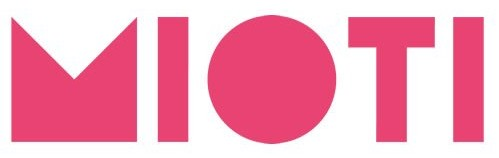<br/><br/>
<center style="color:#888">Machine learning 3</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Diego García Morate</b><br>diegogm@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center; line-height:35px">Challenge S3: Jugando con metaclasificadores</p><br/>

# Objetivos

El objetivo de este challenge es entrenar varios metaclasificadores intentando predecir el rendimiento académico de varios alumnos en base a variables de su entorno.

## Prerrequisitos

Para hacer funcionar este worksheet deberás tener instalados los paquetes:

* `numpy`
* `pandas`
* `scikit-learn`
* `scipy`

## Configuración del entorno

In [1]:
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# # Seleccionamos un tamaño de letra que se pueda leer.
# matplotlib.rcParams.update({'font.size': 14})
from math import sqrt, exp, pi
import sklearn

import random

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neural_network import MLPClassifier

# Dataset

En este challenge vamos a trabajar con un dataset publicado en rel repositorio de la UCI que se llama `Student Performance`. Este dataset relaciona el rendimiento académico de alumnos portugueses de secundaria con un conjunto de variables de entorno. Lo puedes encontrar en: https://archive.ics.uci.edu/ml/datasets/Student+Performance


A continuación se muestra la descripción del dataset: 


<p class="small-heading"><b>Data Set Information:</b></p>
<p class="normal">This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).</p>

<br />

<p class="small-heading"><b>Attribute Information:</b></p>
<p class="normal"># Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
<br>1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br>2 sex - student's sex (binary: 'F' - female or 'M' - male)
<br>3 age - student's age (numeric: from 15 to 22)
<br>4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
<br>5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br>6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<br>7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<br>12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<br>13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br>16 schoolsup - extra educational support (binary: yes or no)
<br>17 famsup - family educational support (binary: yes or no)
<br>18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br>19 activities - extra-curricular activities (binary: yes or no)
<br>20 nursery - attended nursery school (binary: yes or no)
<br>21 higher - wants to take higher education (binary: yes or no)
<br>22 internet - Internet access at home (binary: yes or no)
<br>23 romantic - with a romantic relationship (binary: yes or no)
<br>24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br>25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br>26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br>27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>29 health - current health status (numeric: from 1 - very bad to 5 - very good)
<br>30 absences - number of school absences (numeric: from 0 to 93)
<br>
<br># these grades are related with the course subject, Math or Portuguese:
<br>31 G1 - first period grade (numeric: from 0 to 20)
<br>31 G2 - second period grade (numeric: from 0 to 20)
<br>32 G3 - final grade (numeric: from 0 to 20, output target)</p>
    

# Preprocessing

Empezaremos, como siempre, realizando todo el preprocesamiento necesario.

Lo primero que haremos es cargar el dataset y tratamiento todas las columnas no numéricas:

In [2]:
df = pd.read_csv('student-por.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Como podemos ver existen multitud de columnas que son enumerados. En general, para poder entrenar modelos con este tipo de datos tendremos que convertir estos valores en valores numéricos, para ello nos vamos a construir una función que nos ayude en esta tarea:

In [5]:
def preprocess_column(df, column_name):
    if 'int' in str(df[column_name].dtype):
        return df
        
    values = df[column_name].unique()
    if len(values) == 2:
        # 2 valores, no hay dudas: mapping binario
        df[column_name] = df[column_name].map({values[0]: 0, values[1]: 1})
    elif len(values) == 3:
        # 3 valores: Variables dummy
        df = pd.get_dummies(df, columns=[column_name])
    else:
        # 4 o más: mapping numérico. 
        mapping = {}
        index = 0
        for value in values:
            mapping[value] = index
            index += 1        
        
        df[column_name] = df[column_name].map(mapping)
        
    return df

In [6]:
for column in df.columns:
    df = preprocess_column(df, column)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,4,0,0,...,1,1,3,4,0,11,11,0,1,0
1,0,0,17,0,0,1,1,1,0,1,...,1,1,3,2,9,11,11,1,0,0
2,0,0,15,0,1,1,1,1,0,1,...,2,3,3,6,12,13,12,0,1,0
3,0,0,15,0,0,1,4,2,1,2,...,1,1,5,0,14,14,14,0,1,0
4,0,0,16,0,0,1,3,3,2,1,...,1,2,5,0,11,13,13,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   school           649 non-null    int64
 1   sex              649 non-null    int64
 2   age              649 non-null    int64
 3   address          649 non-null    int64
 4   famsize          649 non-null    int64
 5   Pstatus          649 non-null    int64
 6   Medu             649 non-null    int64
 7   Fedu             649 non-null    int64
 8   Mjob             649 non-null    int64
 9   Fjob             649 non-null    int64
 10  reason           649 non-null    int64
 11  traveltime       649 non-null    int64
 12  studytime        649 non-null    int64
 13  failures         649 non-null    int64
 14  schoolsup        649 non-null    int64
 15  famsup           649 non-null    int64
 16  paid             649 non-null    int64
 17  activities       649 non-null    int64
 18  nursery   

## Matriz de características (X)

Eliminaremos del dataframe todas las columnas objetivo:

In [9]:
X = np.array(df[df.columns.difference(['G1', 'G2', 'G3'])])

In [10]:
X.shape

(649, 32)

In [11]:
X

array([[1, 4, 0, ..., 0, 2, 2],
       [1, 1, 1, ..., 0, 2, 1],
       [2, 1, 1, ..., 0, 2, 1],
       ...,
       [1, 1, 1, ..., 0, 2, 2],
       [3, 1, 2, ..., 1, 1, 2],
       [3, 2, 1, ..., 1, 1, 3]], dtype=int64)

Por último normalizaremos los datos:

In [12]:
from sklearn.preprocessing import normalize

X = normalize(X)

In [13]:
X

array([[0.04805693, 0.19222773, 0.        , ..., 0.        , 0.09611387,
        0.09611387],
       [0.05263158, 0.05263158, 0.05263158, ..., 0.        , 0.10526316,
        0.05263158],
       [0.11094004, 0.05547002, 0.05547002, ..., 0.        , 0.11094004,
        0.05547002],
       ...,
       [0.04938648, 0.04938648, 0.04938648, ..., 0.        , 0.09877296,
        0.09877296],
       [0.14383899, 0.04794633, 0.09589266, ..., 0.04794633, 0.04794633,
        0.09589266],
       [0.13912167, 0.09274778, 0.04637389, ..., 0.04637389, 0.04637389,
        0.13912167]])

## Variable objetivo (y)

Usaremos como variable objetivo la puntuación del primer periodo: `G1`.

In [14]:
y, bins = pd.cut(df.G1, 3, labels=[0, 1, 2], retbins=True)

In [15]:
y

0      0
1      1
2      1
3      2
4      1
      ..
644    1
645    2
646    1
647    1
648    1
Name: G1, Length: 649, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [16]:
bins

array([-0.019     ,  6.33333333, 12.66666667, 19.        ])

In [17]:
y.shape

(649,)

In [18]:
y

0      0
1      1
2      1
3      2
4      1
      ..
644    1
645    2
646    1
647    1
648    1
Name: G1, Length: 649, dtype: category
Categories (3, int64): [0 < 1 < 2]

Finalmente vamos a crear el conjunto de entrenamiento y el conjunto de test:

In [19]:
y.shape

(649,)

Con esto ya tenemos terminado nuestro preprocesamiento.

# Clasificador simple

Entrena un clasificador `svm` simple, con validación cruzada estratificada (5 folds) y evalúa su rendimiento en términos de accuracy calculando la media y varianza de los resultados.

In [20]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

results = cross_val_score(svm.SVC(random_state=42), X, y, scoring='accuracy', cv=5)

print(f"Avg: {np.mean(results)}")
print(f"Var: {np.var(results)}")

Avg: 0.6363625521765057
Var: 0.00034036046280502645


# Voting

Construye un metaclasificador usando `voting` con svm y redes neuronales (MLClassifier), evalúa los resultados en los mismo términos que antes. ¿Los resultados son mejores o peores? ¿es coherente el resultado?

In [21]:
from sklearn.ensemble import VotingClassifier

clasificadores = [
    ('svm', svm.SVC(random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

metaclasificador_combined = VotingClassifier(estimators=clasificadores, voting='hard')
results = cross_val_score(metaclasificador_combined, X, y, scoring='accuracy', cv=5)
print(f"Avg: {np.mean(results)}")
print(f"Var: {np.var(results)}")

Avg: 0.6409779367918903
Var: 0.00023192506993314032


**Respuesta1:** Son algo mejores por que el accuracy es un poquito mejor y la varianza también disminuye un poco.

**Respuesta2:** En principio si parecen lógicos, ya que al estar utilizando dos modelos distintos reducimos el sesgo y subimos la complekidad del modelo resultante de combinarlos.


# Stacking

Entrena un modelo stacked con capas de redes neuronales (MLPClassifier), entrenalo con 1,2,3,4 y 5 capas y evalua los resultados.

In [38]:
#Funcón que crea 1 MLPClasifier con n capas que se pasan en el parámetro num_layers
def create_MLP_Multilayer (num_layers,num_neurons=50):
    hidden_layers=tuple(np.full_like(np.arange(num_layers), num_neurons))
#     print(hidden_layers)
    return [('nn',MLPClassifier(hidden_layer_sizes=hidden_layers,random_state=42))]

In [39]:
# Función que devuelve una lista de n MLPClasifier. El n es pasado en el parámetro num_mplc
def create_n_MLP (num_mlpc,num_neurons=50):
    list_mlpc=[('nn_'+str(i),MLPClassifier(hidden_layer_sizes=(num_neurons,),random_state=42)) for i in range(num_mlpc)]
#     print(list_mlpc)
    return list_mlpc

In [24]:
def print_result(resul_list,resul_list_2=None,legend=None,plt_title=None,x_label=None):
    
    name_x_var=list(resul_list[0].keys())[0]
    x_values= [element.get(name_x_var) for element in resul_list]

    var = [element.get('var') for element in resul_list]
    avg = [element.get('avg') for element in resul_list]
    var_2 = None
    avg_2 = None
    
    
    if (resul_list_2):
        name_x_var_2=list(resul_list_2[0].keys())[0]
        var_2 = [element.get('var') for element in resul_list_2]
        avg_2 = [element.get('avg') for element in resul_list_2]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

    #Varianzas
    ax1.plot(x_values, var, label = 'Acuracy Variance '+name_x_var,marker='o', linewidth=2, markersize=7)
    if var_2:
        ax1.plot(x_values, var_2, label = 'Acuracy Variance '+name_x_var_2,marker='o', linewidth=2, markersize=7)
    title= 'Accuracy Variance'
    ax1.set_title(title)
    ax1.legend()
    ax1.grid(True)
    ax1.set(xlabel=x_label, ylabel="Values")
#     ax1.set_xticks(x_values)
   
    # Promedios
    ax2.plot(x_values, avg, label = 'Acuracy Average '+name_x_var,marker='o', linewidth=2, markersize=7)
    if avg_2:
        ax2.plot(x_values, avg_2, label = 'Acuracy Average '+name_x_var_2,marker='o', linewidth=2, markersize=7)
    title='Accuracy Average'
    ax2.set_title(title)
    ax2.legend()
    ax2.grid(True)
    ax2.set(xlabel=x_label, ylabel="Values")
#     ax2.set_xticks(x_values)
    
    
    # Etiquetamos la figura.
    fig.suptitle(plt_title)
    
    plt.show()
    
    return plt

In [25]:
from sklearn.ensemble import StackingClassifier

layers = list(np.arange(1,6)) # Generamos una lista con las capas que quermos probar. En este caso 5
resul_list_stacking=[]
resul_list_stacking_2=[]

for num_layers in layers:
#     print(f"Para {num_layers} capas")
    metaclasificador_stacked_n_mlpc = StackingClassifier(estimators=create_n_MLP(num_layers))
    results = cross_val_score(metaclasificador_stacked_n_mlpc, X, y, scoring='accuracy', cv=5)
    resul_list_stacking.append(dict(num_mlpc=num_layers,avg=np.mean(results),var=np.var(results)))
    
    
    metaclasificador_stacked_mlpc_nlayers = StackingClassifier(estimators=create_MLP_Multilayer(num_layers))
    results_2 = cross_val_score(metaclasificador_stacked_mlpc_nlayers, X, y, scoring='accuracy', cv=5)
    resul_list_stacking_2.append(dict(num_layers=num_layers,avg=np.mean(results_2),var=np.var(results_2)))
    
      
resul_list_stacking

# Lo comparamos con una red neuronal de las mismas capas.

[{'num_mlpc': 1, 'avg': 0.6533691115086463, 'var': 0.0008399543581138612},
 {'num_mlpc': 2, 'avg': 0.6502921884317232, 'var': 0.0011352435650309766},
 {'num_mlpc': 3, 'avg': 0.6533691115086463, 'var': 0.0012659898610724424},
 {'num_mlpc': 4, 'avg': 0.6533691115086463, 'var': 0.0011476466658061706},
 {'num_mlpc': 5, 'avg': 0.6533691115086463, 'var': 0.0011476466658061706}]

In [41]:
#Funcón que crea 1 MLPClasifier con n capas que se pasan en el parámetro num_layers
def create_MLP_Multilayer_2 (num_layers,num_neurons=50):
    hidden_layers=tuple(np.full_like(np.arange(num_layers), num_neurons))
#     print(hidden_layers)
    return MLPClassifier(hidden_layer_sizes=hidden_layers,random_state=42)

In [44]:
layers = list(np.arange(1,6)) # Generamos una lista con las capas que quermos probar. En este caso 5
resul_list_stacking_3=[]

for num_layers in layers:
    print(f"Para {num_layers} capas")
    mlpc_nlayers = create_MLP_Multilayer_2(num_layers)
    results_3 = cross_val_score(mlpc_nlayers, X, y, scoring='accuracy', cv=5)
    resul_list_stacking_3.append(dict(num_layers=num_layers,avg=np.mean(results_3),var=np.var(results_3)))
resul_list_stacking_3

Para 1 capas
Para 2 capas
Para 3 capas
Para 4 capas
Para 5 capas


[{'num_layers': 1, 'avg': 0.6518306499701848, 'var': 0.001794699553288397},
 {'num_layers': 2, 'avg': 0.6363983303518187, 'var': 0.002091244089862888},
 {'num_layers': 3, 'avg': 0.6364102564102564, 'var': 0.001657856673241289},
 {'num_layers': 4, 'avg': 0.6194633273703042, 'var': 0.0013044684316806463},
 {'num_layers': 5, 'avg': 0.6041025641025641, 'var': 0.003167915844838919}]

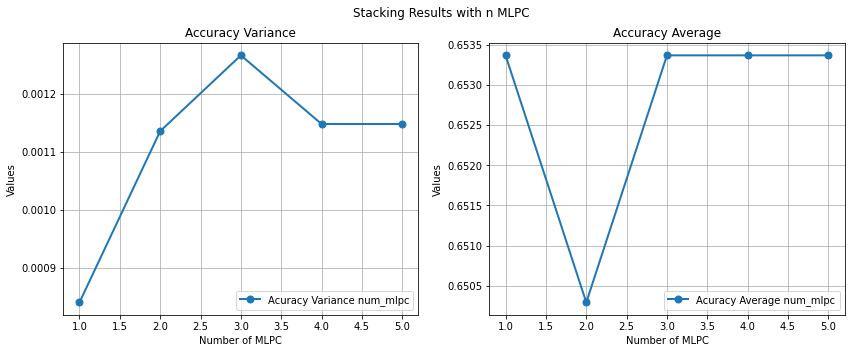

In [26]:
print_result(resul_list_stacking,plt_title='Stacking Results with n MLPC',x_label='Number of MLPC');

In [27]:
resul_list_stacking_2

[{'num_layers': 1, 'avg': 0.6533691115086463, 'var': 0.0008399543581138612},
 {'num_layers': 2, 'avg': 0.6317829457364341, 'var': 0.0004295955416311532},
 {'num_layers': 3, 'avg': 0.6286821705426358, 'var': 0.0007968370699160731},
 {'num_layers': 4, 'avg': 0.6440906380441264, 'var': 0.0008448792442136025},
 {'num_layers': 5, 'avg': 0.6102564102564101, 'var': 0.002132807363576594}]

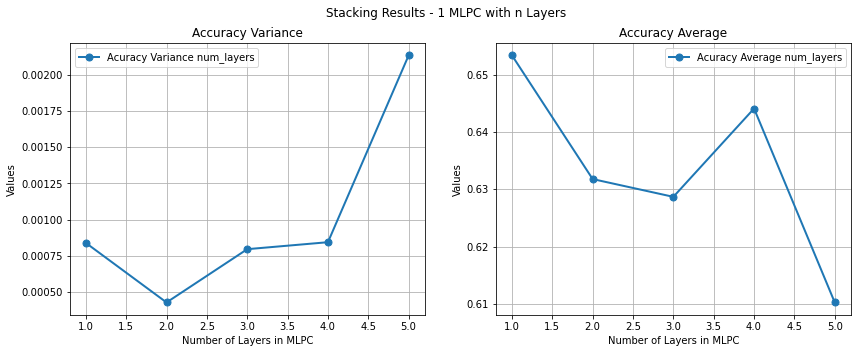

In [28]:
print_result(resul_list_stacking_2, plt_title='Stacking Results - 1 MLPC with n Layers ',x_label='Number of Layers in MLPC');

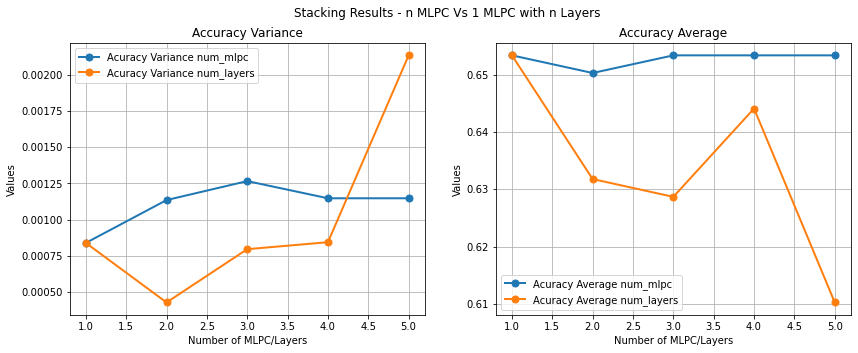

In [29]:
print_result(resul_list_stacking,resul_list_stacking_2,plt_title='Stacking Results - n MLPC Vs 1 MLPC with n Layers', x_label='Number of MLPC/Layers');

* **Respuesta:** Se han utilizado MLPC con capas de 50 neuronas.
    * Para la casuística de ir incorporando MLPC a MLPC de una capa hasta llegar a 5 MLPC, los resultados que se visualizan es que a partir del 3 MLPC los resultados se estancan tanto en la varianza como en el promedio.
    * Para la casuística de utilizar un único MPLC con N layers hasta llegar 5, los resultados que observamos es que al ir utilizando más capas la varianza va aumentando al final con 5 capas el incremento es mayor. El promedio del accuracy también va empeorando conforme se van incluyendo capas, salvo en en el de 4 capas que mejora. En el de 5 capas obtenemos los peores resultados. Por lo que parece que conforme se va a haciendo más complejo los resultados van siendo peores.
    * Comparativamente, estimo que se obtienen mejores resultados al ir incorporando MLPC, que no ir apilando capas a 1 MLPC, en este caso el ir depurando las entradas de un MLPC con la salida del otro, parece que da mejores resultados o por lo menos son más estables.

# Bagging


Entrena con bagging un svm y varia el número de estimadores de 100, 250, 500, 750, 1000. Comenta los resultados.

In [34]:
from sklearn.ensemble import BaggingClassifier
estimators = [100,250,500,750,1000]
resul_list_bagging=[]
for num_estimator in estimators:
   
    metaclasificador_bagging = BaggingClassifier(
        base_estimator=svm.SVC(random_state=42),
        n_estimators=100, 
        max_samples=0.66, 
        max_features=0.66 

    )
    results = cross_val_score(metaclasificador_bagging, X, y, scoring='accuracy', cv=5)
#     print(f"Avg: {np.mean(results)}")
#     print(f"Var: {np.var(results)}")
    resul_list_bagging.append(dict(num_estimator=num_estimator,avg=np.mean(results),var=np.var(results)))
resul_list_bagging

[{'num_estimator': 100,
  'avg': 0.6332856290995826,
  'var': 0.0002233016122935835},
 {'num_estimator': 250,
  'avg': 0.6363625521765057,
  'var': 0.00017467998943224633},
 {'num_estimator': 500,
  'avg': 0.6332856290995826,
  'var': 0.0001049584170273107},
 {'num_estimator': 750,
  'avg': 0.6394394752534287,
  'var': 0.0003201412068075954},
 {'num_estimator': 1000,
  'avg': 0.6348240906380441,
  'var': 0.0002486949428747498}]

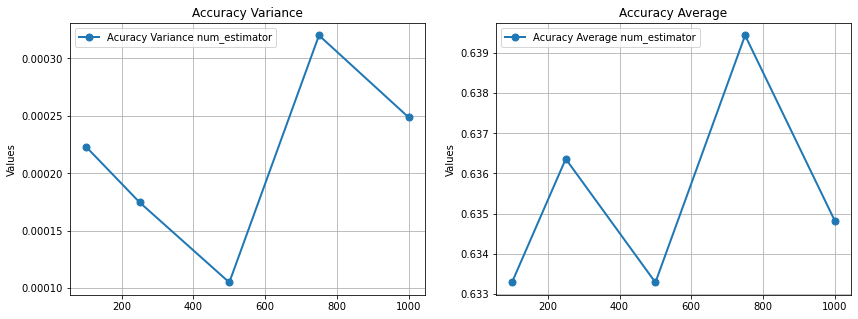

In [35]:
print_result(resul_list_bagging);

* **Respuesta:** Las variaciones de los valores tanto de la varianza como del promedio del accuracy son mínimos (aunque en las gráficas parezcan más), nos movemos tanto en uno como en otro en el rango de milésimas. Los mejores resultados se obtienen con 750 estimadores, en cuanto al promedio del accuracy. Los más bajos en 500 estimadores, tanto del promedio como de la varianza. En principio los valores son muy similares a los de Stacking y Voting

# Boosting

Entrena un modelo con Adaboost con 100, 250, 500, 750, 1000 estimadores y comenta los resultados en términos de accuracy y varianza del mismo.

In [32]:
# Pintar una gráfica de como fluctua la varianza y el accuracy con respecto al número de estimadores.

from sklearn.ensemble import AdaBoostClassifier
estimators = [100, 250, 500, 750, 1000]
resul_list_Boosting = []
for num_estimator in estimators:
    metaclasificador_boosting = AdaBoostClassifier(n_estimators=num_estimator,random_state=42)
    results = cross_val_score(metaclasificador_boosting,X, y, scoring='accuracy', cv=5)
#     print(f"Avg: {np.mean(results)}")
#     print(f"Var: {np.var(results)}")
    resul_list_Boosting.append(dict(num_estimator=num_estimator,avg=np.mean(results),var=np.var(results)))
resul_list_Boosting

[{'num_estimator': 100,
  'avg': 0.6055694692903995,
  'var': 0.004606439147055697},
 {'num_estimator': 250,
  'avg': 0.5886583184257603,
  'var': 0.004180972283114814},
 {'num_estimator': 500,
  'avg': 0.5932737030411449,
  'var': 0.004465546385220221},
 {'num_estimator': 750,
  'avg': 0.6055933214072748,
  'var': 0.0044478784665663235},
 {'num_estimator': 1000,
  'avg': 0.6086821705426357,
  'var': 0.003023413832449901}]

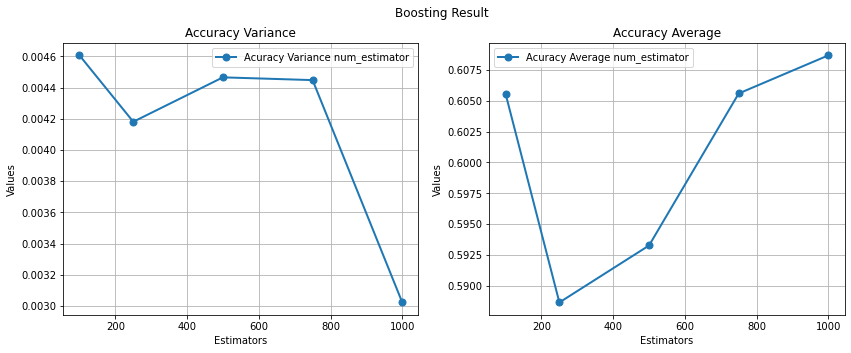

In [33]:
print_result(resul_list_Boosting,plt_title='Boosting Result',x_label='Estimators');

**Respuesta:** Se observa que en los puntos donde mejora el promedio del accuracy la varianza esta en mínimos. Los mejores resultados se obtienen con 1000 estimadores. Los valores, en principio parecen los más modestos comparados con los de los anteriores metaclasifcadores.